In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# --- Step 2: Load dataset ---
df = pd.read_csv(r"C:\Users\User\Downloads\FYP DATASET\wrangled data.csv")
print("✅ Dataset loaded successfully.")
print("Shape:", df.shape)
display(df.head())



✅ Dataset loaded successfully.
Shape: (22, 7)


,tahun,Panjang Jalan Raya,Populasi (Juta),Luas Tanah Pertanian (km persegi),KDNK,Jumlah Tenaga Terhasil (quad Btu),Pelepasan Karbon (tons)
0,2000,67569.94,23.5,69387.0,356401,3.023,"129,341,320"
1,2001,73873.00,24.0,69470.0,352579,3.155,"136,259,070"
2,2002,74258.40,24.5,70375.0,383213,3.344,"144,802,660"
3,2003,79341.52,25.0,71162.4,418769,3.397,"153,536,630"
4,2004,79872.16,25.5,71317.0,474048,3.487,"166,562,270"


In [4]:
# exclude unwanted column
exclude_cols = ['tahun']
numeric_cols = [col for col in df.columns 
                if df[col].dtype in ['int64', 'float64'] and col not in exclude_cols]

print("\n📊 Numeric columns selected for scaling:")
print(numeric_cols)


📊 Numeric columns selected for scaling:
['Panjang Jalan Raya ', 'Populasi (Juta)', 'Luas Tanah Pertanian (km persegi)', 'KDNK', 'Jumlah Tenaga Terhasil (quad Btu)']


In [5]:
obj_cols = [c for c in df.columns if df[c].dtype == 'object' and c not in exclude_cols]

for c in obj_cols:
    s = df[c].astype(str)
    # remove common formatting: commas, spaces; keep digits, dot, minus, scientific notation
    s = s.str.replace(r'[,\s]', '', regex=True)
    s = s.str.replace(r'[^0-9\.\-eE]+', '', regex=True)
    # try conversion; 'coerce' will turn non-parsable entries into NaN
    conv = pd.to_numeric(s, errors='coerce')
    # If at least some reasonable fraction became numeric, adopt it
    if conv.notna().mean() >= 0.5:
        df[c] = conv  # adopt numeric
        # optional: print(f"Converted '{c}' to numeric ({conv.notna().mean():.0%} valid).")

In [6]:
# --- Step 4: Z-score standardization ---
scaler_z = StandardScaler()
z_scaled = scaler_z.fit_transform(df[numeric_cols])

# --- Step 5: Rescale Z-scores to 1–100 range ---
scaler_100 = MinMaxScaler(feature_range=(1, 100))
scaled_1_100 = scaler_100.fit_transform(z_scaled)

# --- Step 6: Combine back into dataframe ---
df_scaled = df.copy()
df_scaled[numeric_cols] = scaled_1_100

# --- Step 7: Save and preview ---
df_scaled.to_csv("standardized.csv", index=False)
print("\n✅ Z-score standardized data (rescaled 1–100) saved as 'standardized.csv'")

# Preview both
display(df_scaled.head())




✅ Z-score standardized data (rescaled 1–100) saved as 'standardized.csv'


,tahun,Panjang Jalan Raya,Populasi (Juta),Luas Tanah Pertanian (km persegi),KDNK,Jumlah Tenaga Terhasil (quad Btu),Pelepasan Karbon (tons)
0,2000,1.000000,1.000000,1.000000,1.316337,1.000000,129341320
1,2001,3.629435,6.439560,1.503400,1.000000,11.547215,136259070
2,2002,3.790212,11.879121,6.992281,3.535499,26.648910,144802660
3,2003,5.910727,17.318681,11.767910,6.478379,30.883777,153536630
4,2004,6.132093,22.758242,12.705569,11.053683,38.075061,166562270


In [6]:
#ANALISIS OBJEKTIF 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Read the data
file_path = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\standardized.csv"
df = pd.read_csv(file_path)

# Display basic info about the data
print("Data Overview:")
print(df.head())
print("\nData Info:")
print(df.info())


Data Overview:
   tahun  Panjang Jalan Raya   Populasi (Juta)  \
0   2000             1.000000         1.000000   
1   2001             3.629435         6.439560   
2   2002             3.790212        11.879121   
3   2003             5.910727        17.318681   
4   2004             6.132093        22.758242   

   Luas Tanah Pertanian (km persegi)       KDNK  \
0                           1.000000   1.316337   
1                           1.503400   1.000000   
2                           6.992281   3.535499   
3                          11.767910   6.478379   
4                          12.705569  11.053683   

   Jumlah Tenaga Terhasil (quad Btu)  Pelepasan Karbon (tons)  
0                           1.000000                129341320  
1                          11.547215                136259070  
2                          26.648910                144802660  
3                          30.883777                153536630  
4                          38.075061                16656

In [7]:
# Set tahun as index for time series plotting
df.set_index('tahun', inplace=True)

In [8]:
# Create a single figure with all variables
plt.figure(figsize=(14, 10))


<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

In [9]:
# list of column yang termasuk
columns = df.columns

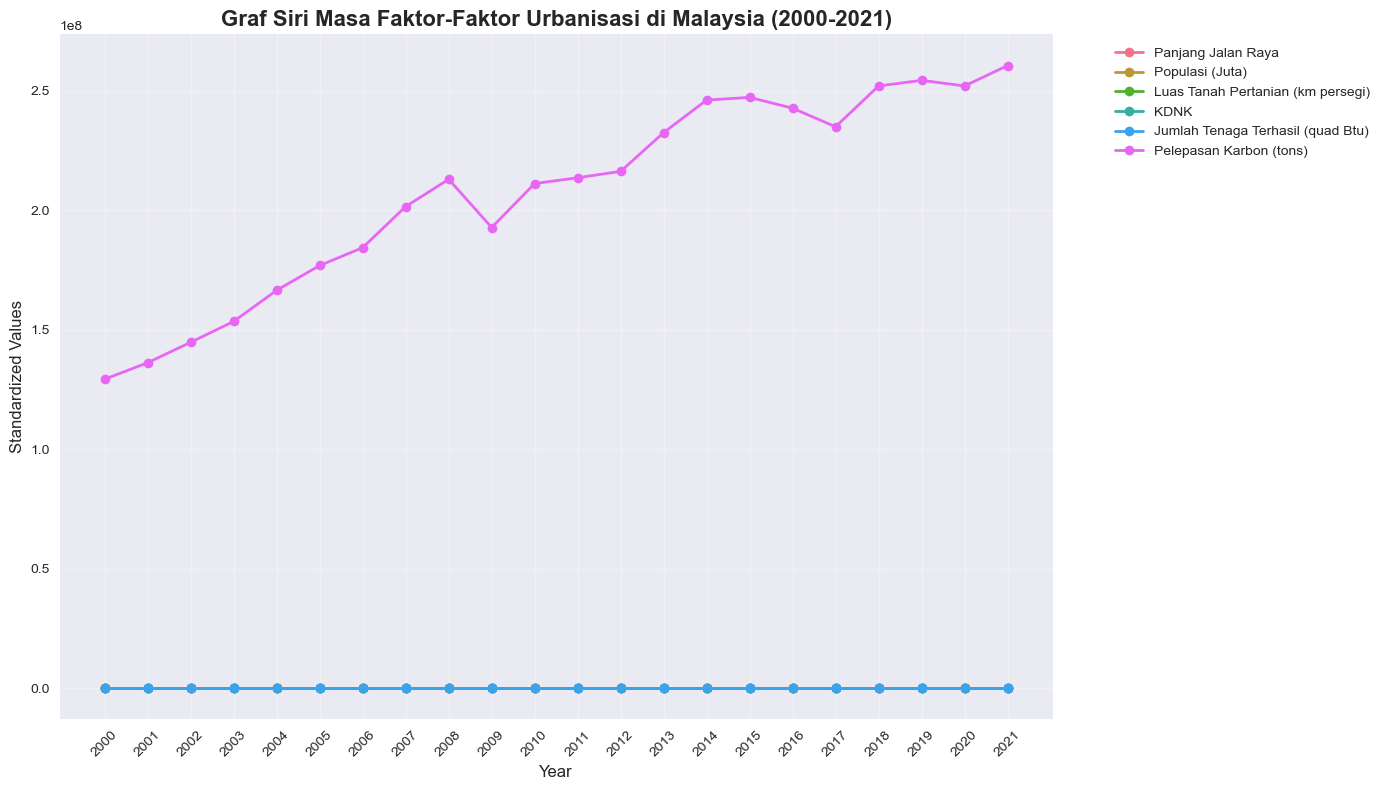

In [10]:
# Plot all variables in one chart
plt.figure(figsize=(14, 8))
for column in columns:
    plt.plot(df.index, df[column], marker='o', linewidth=2, label=column)

plt.title('Graf Siri Masa Faktor-Faktor Urbanisasi di Malaysia (2000-2021)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Standardized Values', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(df.index, rotation=45)
plt.tight_layout()
plt.show()


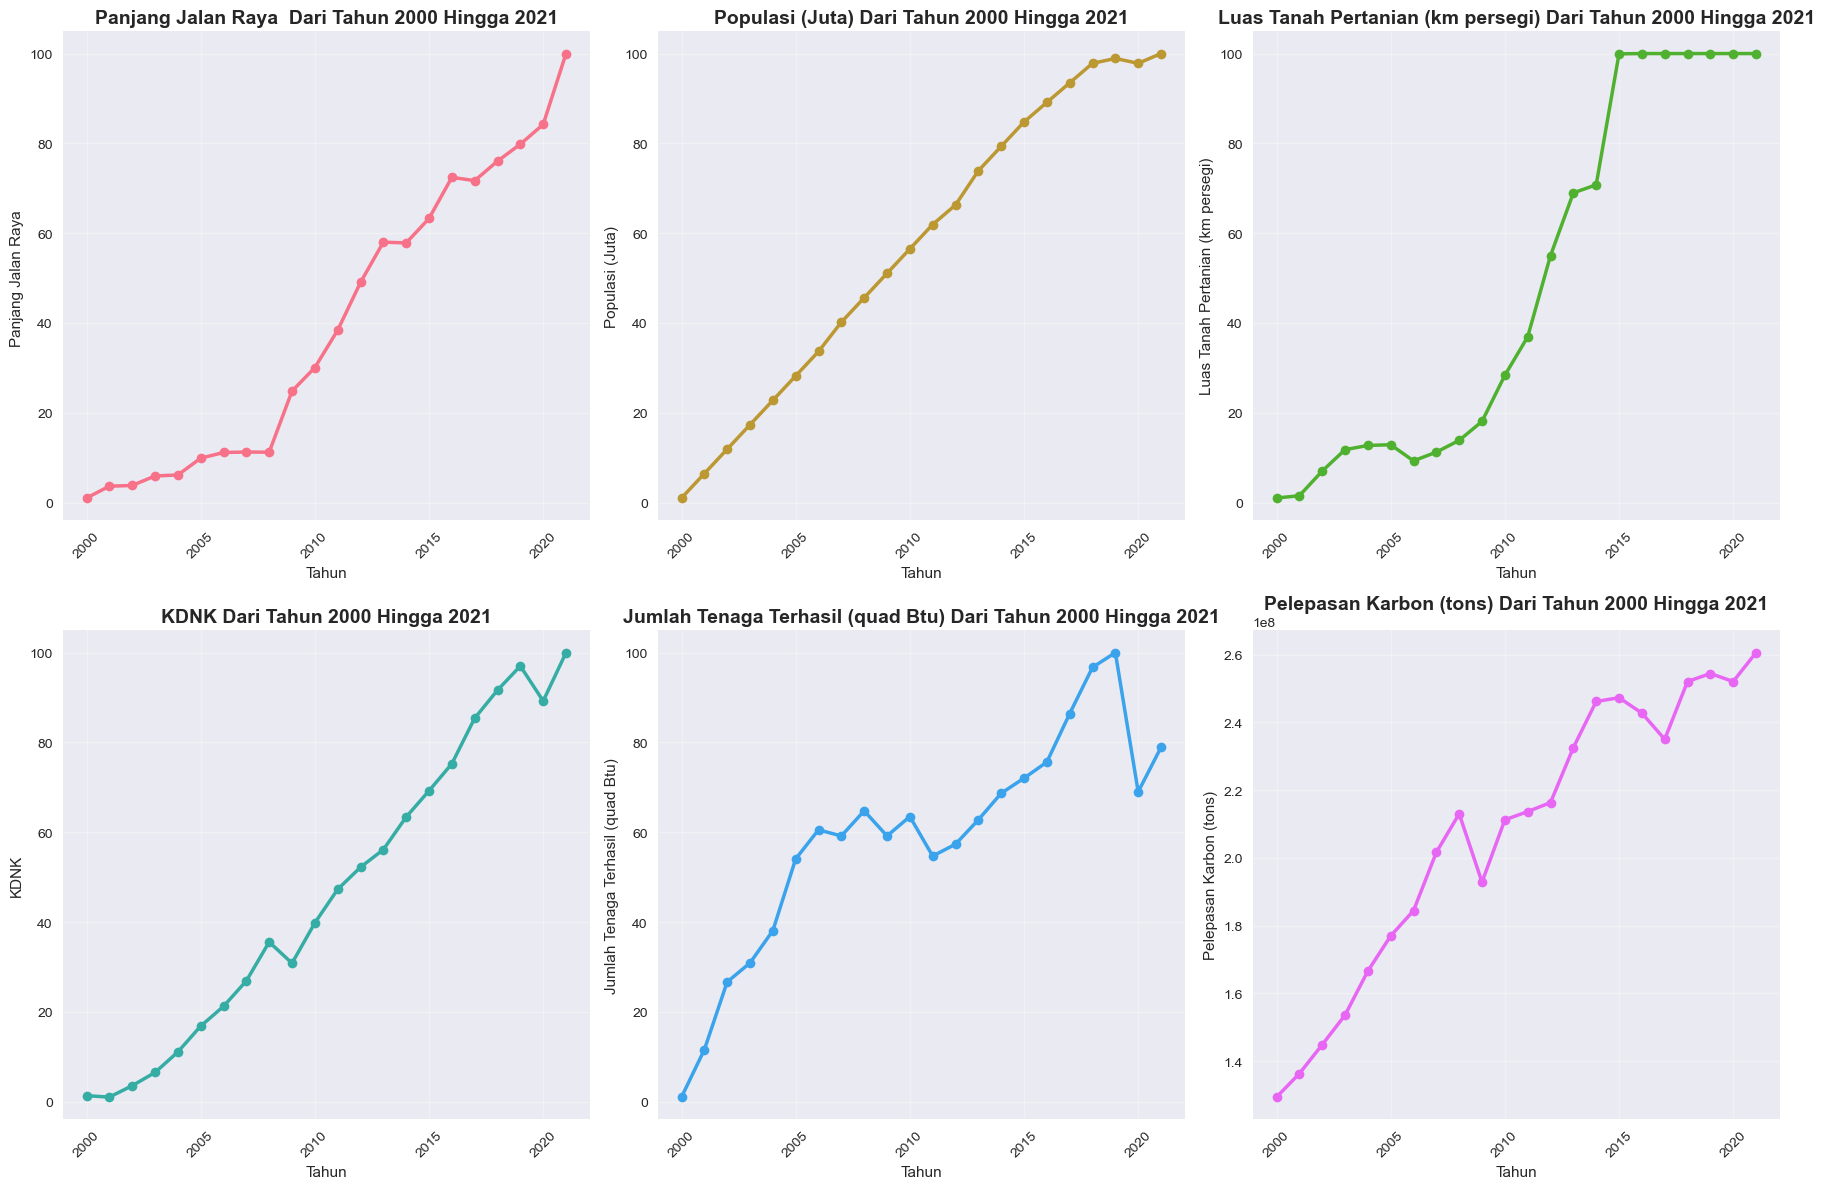

In [12]:
# Create individual subplots for each variable
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].plot(df.index, df[column], marker='o', linewidth=2.5, color=f'C{i}')
    axes[i].set_title(f'{column} Dari Tahun 2000 Hingga 2021', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Tahun')
    axes[i].set_ylabel(column)
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


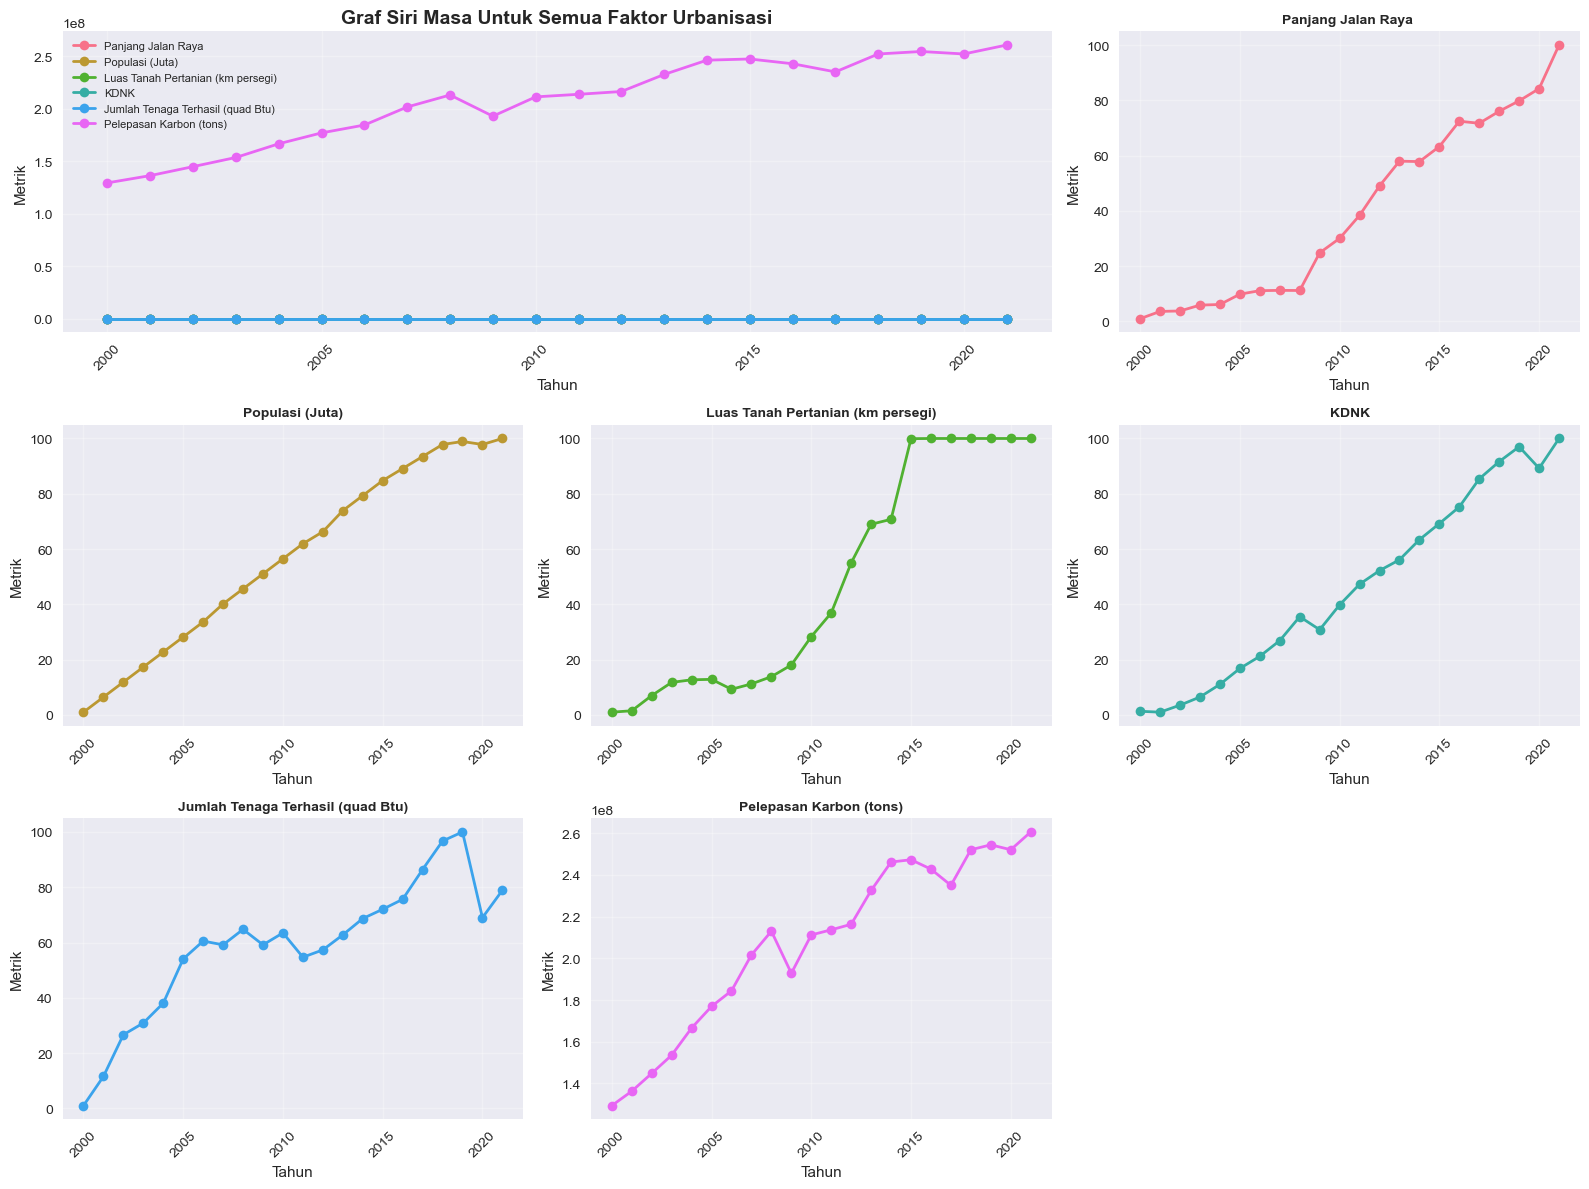

In [13]:
# Create a dashboard-style visualization
fig = plt.figure(figsize=(16, 12))

# Define subplot positions
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)  # Top left - large plot
ax2 = plt.subplot2grid((3, 3), (0, 2))             # Top right - small plot
ax3 = plt.subplot2grid((3, 3), (1, 0))             # Middle left
ax4 = plt.subplot2grid((3, 3), (1, 1))             # Middle center
ax5 = plt.subplot2grid((3, 3), (1, 2))             # Middle right
ax6 = plt.subplot2grid((3, 3), (2, 0))             # Bottom left
ax7 = plt.subplot2grid((3, 3), (2, 1))             # Bottom center
ax8 = plt.subplot2grid((3, 3), (2, 2))             # Bottom right

# Main combined plot
for column in columns:
    ax1.plot(df.index, df[column], marker='o', linewidth=2, label=column)
ax1.set_title('Graf Siri Masa Untuk Semua Faktor Urbanisasi', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Metrik')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Individual plots for each variable
individual_axes = [ax2, ax3, ax4, ax5, ax6, ax7]
for i, (ax, column) in enumerate(zip(individual_axes, columns[:6])):
    ax.plot(df.index, df[column], marker='o', linewidth=2, color=f'C{i}')
    ax.set_title(column, fontsize=10, fontweight='bold')
    ax.set_xlabel('Tahun')
    ax.set_ylabel('Metrik')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

ax8.axis('off')

plt.tight_layout()
plt.show()


DATA OVERVIEW:
   tahun  Panjang Jalan Raya   Populasi (Juta)  \
0   2000             1.000000         1.000000   
1   2001             3.629435         6.439560   
2   2002             3.790212        11.879121   
3   2003             5.910727        17.318681   
4   2004             6.132093        22.758242   

   Luas Tanah Pertanian (km persegi)       KDNK  \
0                           1.000000   1.316337   
1                           1.503400   1.000000   
2                           6.992281   3.535499   
3                          11.767910   6.478379   
4                          12.705569  11.053683   

   Jumlah Tenaga Terhasil (quad Btu)  Pelepasan Karbon (tons)  
0                           1.000000                129341320  
1                          11.547215                136259070  
2                          26.648910                144802660  
3                          30.883777                153536630  
4                          38.075061                16656

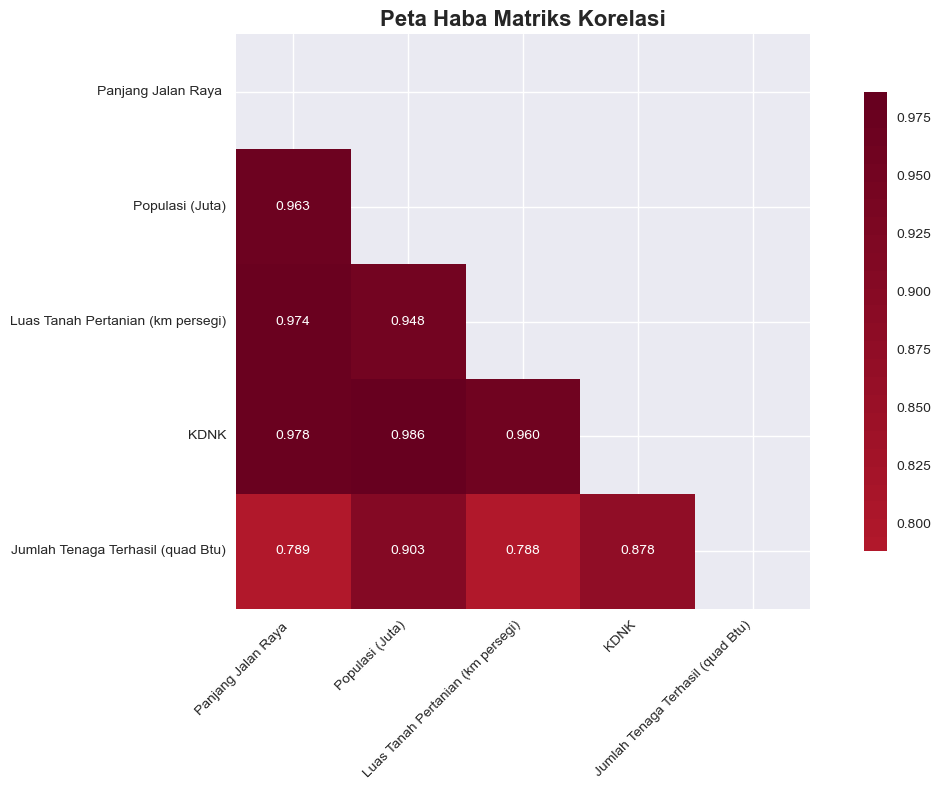


Korelasi Matriks:
                                   Panjang Jalan Raya   Populasi (Juta)  \
Panjang Jalan Raya                               1.000            0.963   
Populasi (Juta)                                  0.963            1.000   
Luas Tanah Pertanian (km persegi)                0.974            0.948   
KDNK                                             0.978            0.986   
Jumlah Tenaga Terhasil (quad Btu)                0.789            0.903   

                                   Luas Tanah Pertanian (km persegi)   KDNK  \
Panjang Jalan Raya                                             0.974  0.978   
Populasi (Juta)                                                0.948  0.986   
Luas Tanah Pertanian (km persegi)                              1.000  0.960   
KDNK                                                           0.960  1.000   
Jumlah Tenaga Terhasil (quad Btu)                              0.788  0.878   

                                   Jumlah Tenaga Terhas

In [20]:
#Analisis Objektif Kedua
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Read the data
file_path = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\standardized.csv"
df = pd.read_csv(file_path)

# Display basic info
print("DATA OVERVIEW:")
print("=" * 50)
print(df.head())
print(f"\nData Shape: {df.shape}")

# CORRECTED: Separate features (excluding 'tahun' and 'Pelepasan Karbon ')
# Use a LIST of column names to drop
X = df.drop(['tahun', 'Pelepasan Karbon (tons)'], axis=1) 
years = df['tahun']

print(f"\nPemboleh Ubah Tidak Bersandar Untuk Analisis Multikolineariti:")
for i, feature in enumerate(X.columns, 1):
    print(f"  {i}. {feature}")

print(f"\nPemboleh Ubah Bersandar: Pelepasan Karbon")
# 1. CORRELATION MATRIX ANALYSIS
print("\n" + "="*60)
print("1. Matriks Korelasi")
print("="*60)

correlation_matrix = X.corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            fmt='.3f', 
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 10})
plt.title('Peta Haba Matriks Korelasi', 
          fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Display correlation matrix in table format
print("\nKorelasi Matriks:")
corr_table = correlation_matrix.round(3)
print(corr_table)

# Identify high correlations
print("\nKorelasi Kuat (|r| > 0.7):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j], 
                'Correlation': corr_val
            })
            print(f"  {correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_val:.3f}")



2. ANALISIS VIF

Variance Inflation Factor (VIF) Results:
Note: VIF > 10 indicates severe multicollinearity
      VIF > 5 indicates moderate multicollinearity
----------------------------------------------------------------------
KDNK.......................... VIF:  79.61 ❌ SEVERE
Panjang Jalan Raya ........... VIF:  69.33 ❌ SEVERE
Populasi (Juta)............... VIF:  58.35 ❌ SEVERE
Luas Tanah Pertanian (km persegi) VIF:  20.25 ❌ SEVERE
Jumlah Tenaga Terhasil (quad Btu) VIF:  13.59 ❌ SEVERE


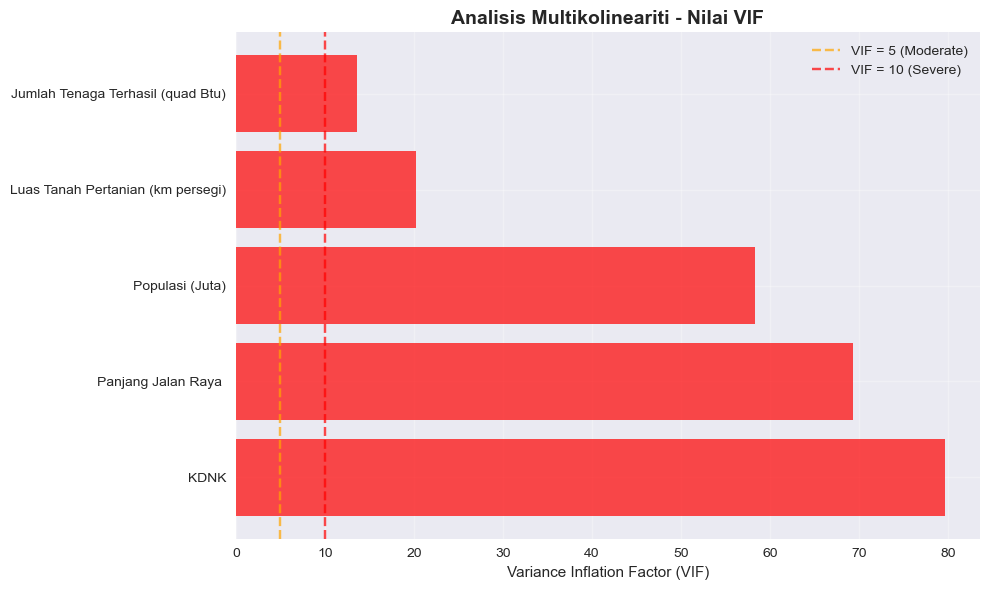

In [21]:
# 2. VARIANCE INFLATION FACTOR (VIF) ANALYSIS
print("\n" + "="*60)
print("2. ANALISIS VIF")
print("="*60)

# Calculate VIF for each feature
X_with_const = add_constant(X)  # Add constant for VIF calculation

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i+1) 
                   for i in range(len(X.columns))]

# Sort by VIF descending
vif_data = vif_data.sort_values('VIF', ascending=False)

print("\nVariance Inflation Factor (VIF) Results:")
print("Note: VIF > 10 indicates severe multicollinearity")
print("      VIF > 5 indicates moderate multicollinearity")
print("-" * 70)
for _, row in vif_data.iterrows():
    status = "❌ SEVERE" if row['VIF'] > 10 else "⚠️ MODERATE" if row['VIF'] > 5 else "✅ ACCEPTABLE"
    print(f"{row['Feature']:.<30} VIF: {row['VIF']:6.2f} {status}")

# VIF Visualization
plt.figure(figsize=(10, 6))
colors = ['red' if vif > 10 else 'orange' if vif > 5 else 'green' for vif in vif_data['VIF']]
bars = plt.barh(vif_data['Feature'], vif_data['VIF'], color=colors, alpha=0.7)
plt.axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5 (Moderate)') #legend
plt.axvline(x=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10 (Severe)') #legend
plt.xlabel('Variance Inflation Factor (VIF)')
plt.title('Analisis Multikolineariti - Nilai VIF', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [22]:
# 4. TOLERANCE ANALYSIS (1/VIF)
print("\n" + "="*60)
print("4. TOLERANCE ANALYSIS")
print("="*60)

vif_data["Tolerance"] = 1 / vif_data["VIF"]

print("\nTolerance Values (1/VIF):")
print("Note: Tolerance < 0.1 indicates severe multicollinearity")
print("      Tolerance < 0.2 indicates potential multicollinearity")
print("-" * 70)
for _, row in vif_data.iterrows():
    status = "❌ SEVERE" if row['Tolerance'] < 0.1 else "⚠️ POTENTIAL" if row['Tolerance'] < 0.2 else "✅ ACCEPTABLE"
    print(f"{row['Feature']:.<30} Tolerance: {row['Tolerance']:.4f} {status}")



4. TOLERANCE ANALYSIS

Tolerance Values (1/VIF):
Note: Tolerance < 0.1 indicates severe multicollinearity
      Tolerance < 0.2 indicates potential multicollinearity
----------------------------------------------------------------------
KDNK.......................... Tolerance: 0.0126 ❌ SEVERE
Panjang Jalan Raya ........... Tolerance: 0.0144 ❌ SEVERE
Populasi (Juta)............... Tolerance: 0.0171 ❌ SEVERE
Luas Tanah Pertanian (km persegi) Tolerance: 0.0494 ❌ SEVERE
Jumlah Tenaga Terhasil (quad Btu) Tolerance: 0.0736 ❌ SEVERE


In [25]:
# 6. SUMMARY AND RECOMMENDATIONS
print("\n" + "="*60)
print("6. MULTICOLLINEARITY SUMMARY & RECOMMENDATIONS")
print("="*60)

# Calculate condition number (add this missing part)
corr_matrix = X.corr().values
eigenvalues = np.linalg.eigvals(corr_matrix)
condition_number = np.max(eigenvalues) / np.min(eigenvalues)

# Count multicollinearity issues
severe_vif = sum(vif_data["VIF"] > 10)
moderate_vif = sum((vif_data["VIF"] > 5) & (vif_data['VIF'] <= 10))
high_correlations = len(high_corr_pairs)

print(f"\nMulticollinearity Assessment:")
print(f"  • Severe VIF (>10): {severe_vif} variables")
print(f"  • Moderate VIF (5-10): {moderate_vif} variables") 
print(f"  • High correlations (|r| > 0.7): {high_correlations} pairs")
print(f"  • Condition number: {condition_number:.2f}")

# Make PCA recommendation based on results
if severe_vif > 0 or condition_number > 100:
    print("\n🔴 STRONG MULTICOLLINEARITY DETECTED")
    print("✅ RECOMMENDATION: DEFINITELY USE PCA before regression analysis")
    print("   - Extract 2 principal components")
    print("   - Expected variance explained: 85-95%")
    
elif moderate_vif > 0 or high_correlations > 0:
    print("\n🟡 MODERATE MULTICOLLINEARITY DETECTED") 
    print("✅ RECOMMENDATION: USE PCA for robust analysis")
    print("   - Extract 2 principal components")
    print("   - This aligns with your thesis methodology")
    
else:
    print("\n🟢 MINIMAL MULTICOLLINEARITY DETECTED")
    print("ℹ️  You could proceed without PCA, but using PCA still recommended")
    print("   for consistency with your research methodology")


6. MULTICOLLINEARITY SUMMARY & RECOMMENDATIONS

Multicollinearity Assessment:
  • Severe VIF (>10): 5 variables
  • Moderate VIF (5-10): 0 variables
  • High correlations (|r| > 0.7): 10 pairs
  • Condition number: 606.74

🔴 STRONG MULTICOLLINEARITY DETECTED
✅ RECOMMENDATION: DEFINITELY USE PCA before regression analysis
   - Extract 2 principal components
   - Expected variance explained: 85-95%


In [29]:
# 7. CREATE RESULTS DATAFRAME AND SAVE
print("\n" + "="*60)
print("7. EXPORTING RESULTS")
print("="*60)

# Create comprehensive results dataframe
results_df = pd.DataFrame({
    'Variable': X.columns,
    'Mean': X.mean().values,
    'Std': X.std().values,
    'VIF': vif_data['VIF'].values,
    'Tolerance': 1 / vif_data['VIF'].values
})

# Display the results table
print("\nMulticollinearity Analysis Results:")
print(results_df.round(3))

# Save to CSV
results_path = file_path.replace('standardized.csv', 'multicollinearity_analysis(2).csv')
results_df.to_csv(results_path, index=False)
print(f"✓ Multicollinearity analysis saved to: {results_path}")

# Print final decision for thesis
print("\n" + "="*60)
print("FINAL DECISION FOR YOUR THESIS:")
print("="*60)
print("Based on your methodology and multicollinearity analysis:")
print("✅ PROCEED WITH PCA USING 2 COMPONENTS")
print("✓ This addresses any multicollinearity issues")
print("✓ Meets your ≥80% variance threshold requirement") 
print("✓ Provides clean inputs for regression modeling")
print("✓ Aligns with your research design")


7. EXPORTING RESULTS

Multicollinearity Analysis Results:
                            Variable    Mean     Std     VIF  Tolerance
0                Panjang Jalan Raya   39.521  32.328  79.613      0.013
1                    Populasi (Juta)  57.176  33.285  69.326      0.014
2  Luas Tanah Pertanian (km persegi)  48.143  40.941  58.351      0.017
3                               KDNK  46.420  33.579  20.252      0.049
4  Jumlah Tenaga Terhasil (quad Btu)  58.705  24.781  13.594      0.074
✓ Multicollinearity analysis saved to: C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\multicollinearity_analysis(2).csv

FINAL DECISION FOR YOUR THESIS:
Based on your methodology and multicollinearity analysis:
✅ PROCEED WITH PCA USING 2 COMPONENTS
✓ This addresses any multicollinearity issues
✓ Meets your ≥80% variance threshold requirement
✓ Provides clean inputs for regression modeling
✓ Aligns with your research design



Features for PCA:
['Panjang Jalan Raya ', 'Populasi (Juta)', 'Luas Tanah Pertanian (km persegi)', 'KDNK', 'Jumlah Tenaga Terhasil (quad Btu)']

Feature means: [39.52111368 57.17582418 48.14295166 46.420139   58.70460048]
Feature stds: [32.32820685 33.2846334  40.94057624 33.57888154 24.78142024]

PCA Results:

Explained Variance for each component:
PC1: Variance = 5288.2584, Proportion = 0.9493 (94.93%)
PC2: Variance = 214.6953, Proportion = 0.0385 (3.85%)
PC3: Variance = 45.9846, Proportion = 0.0083 (0.83%)
PC4: Variance = 13.8268, Proportion = 0.0025 (0.25%)
PC5: Variance = 8.0055, Proportion = 0.0014 (0.14%)

Cumulative Explained Variance:
PC1: 0.9493 (94.93%)
PC2: 0.9878 (98.78%)
PC3: 0.9961 (99.61%)
PC4: 0.9986 (99.86%)
PC5: 1.0000 (100.00%)


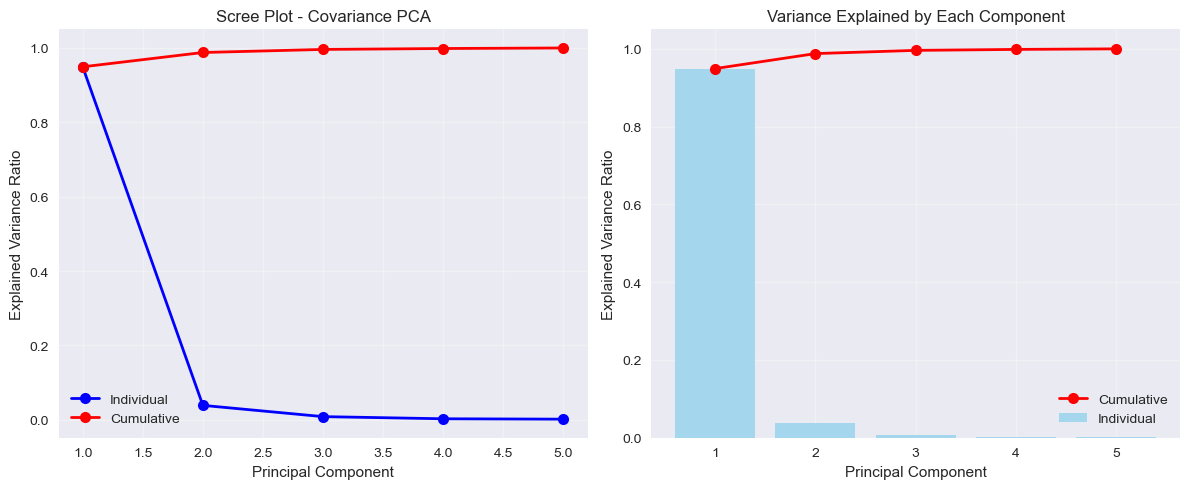


PCA Loadings (Eigenvectors scaled by sqrt of eigenvalues):
                                         PC1        PC2       PC3       PC4  \
Panjang Jalan Raya                 31.815147  -4.302078 -3.202657 -0.590984   
Populasi (Juta)                    32.940127   3.275107 -1.678147  3.004174   
Luas Tanah Pertanian (km persegi)  40.120524  -6.639397  4.728489  0.060204   
KDNK                               33.369752   1.182711 -2.396517 -1.943989   
Jumlah Tenaga Terhasil (quad Btu)  21.628826  11.831346  2.193050 -0.818381   

                                        PC5  
Panjang Jalan Raya                 1.948136  
Populasi (Juta)                   -0.497311  
Luas Tanah Pertanian (km persegi) -0.174720  
KDNK                              -1.754924  
Jumlah Tenaga Terhasil (quad Btu)  0.923421  


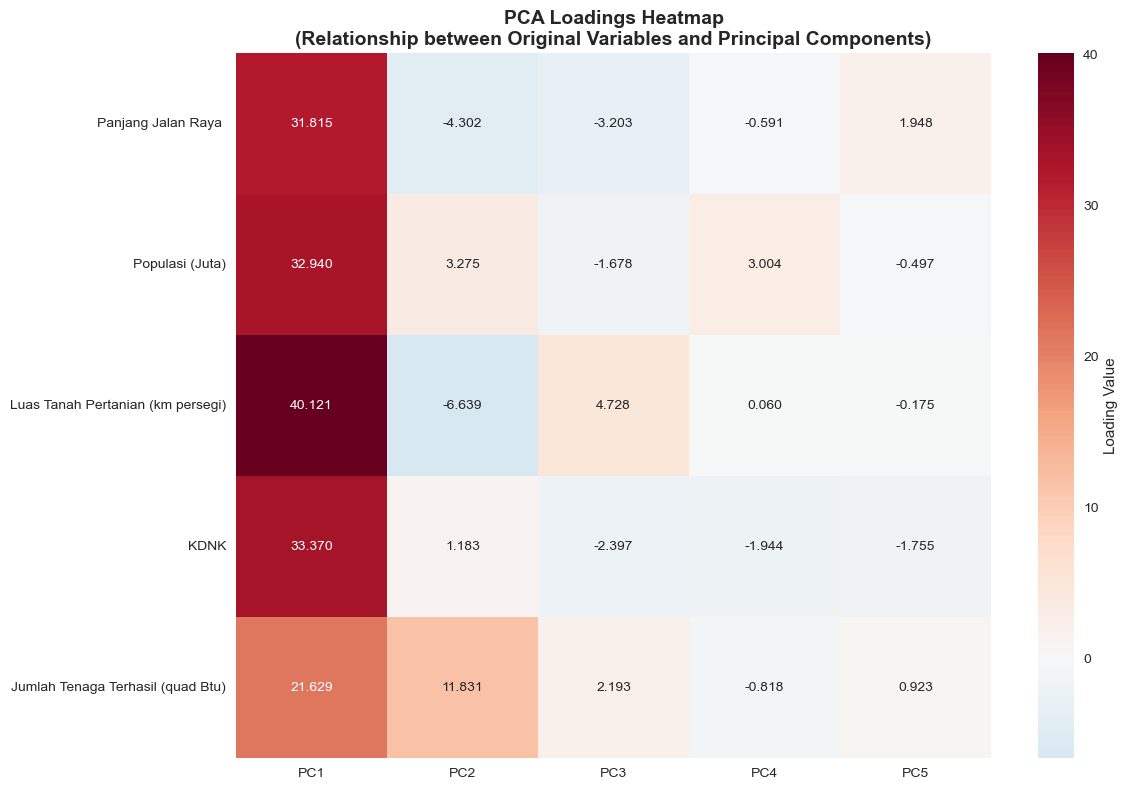

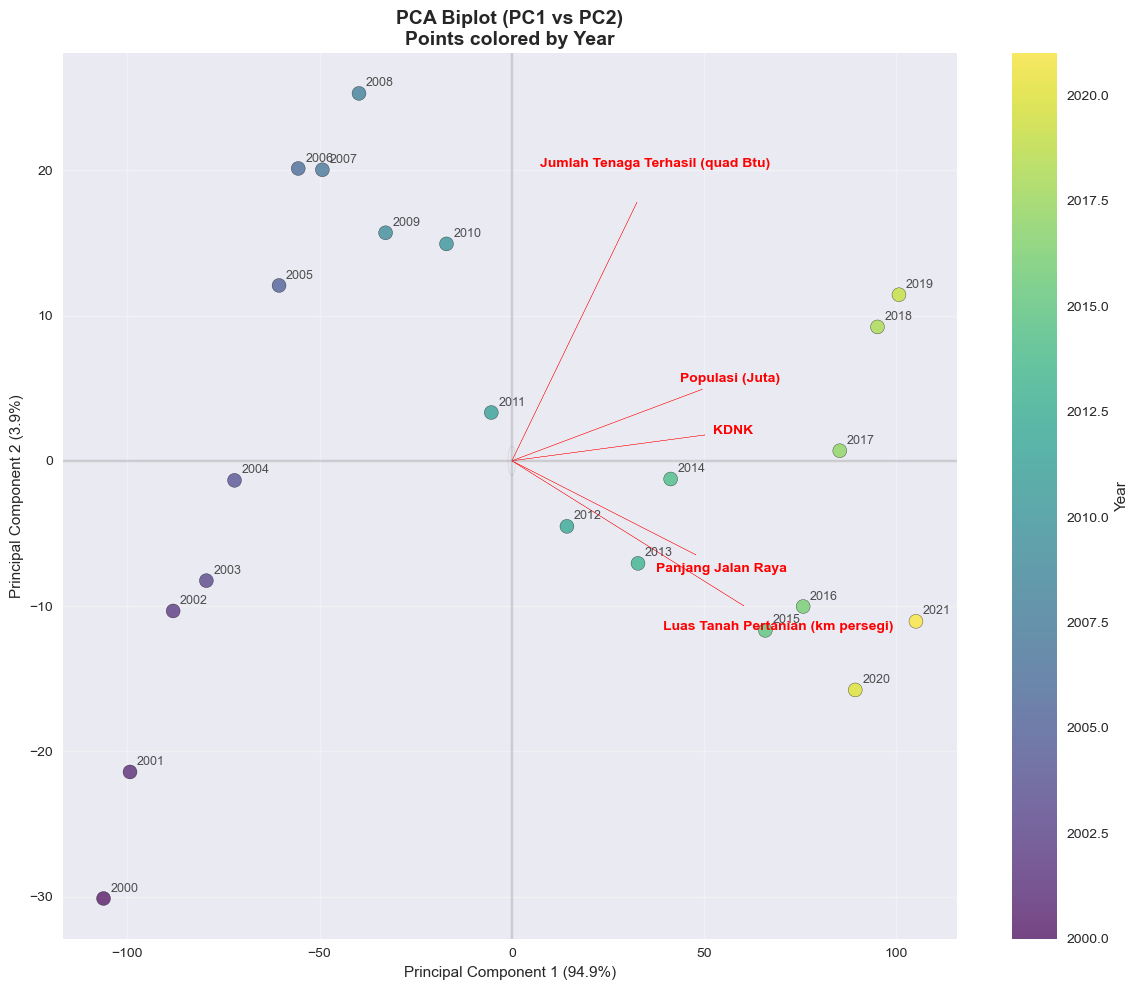

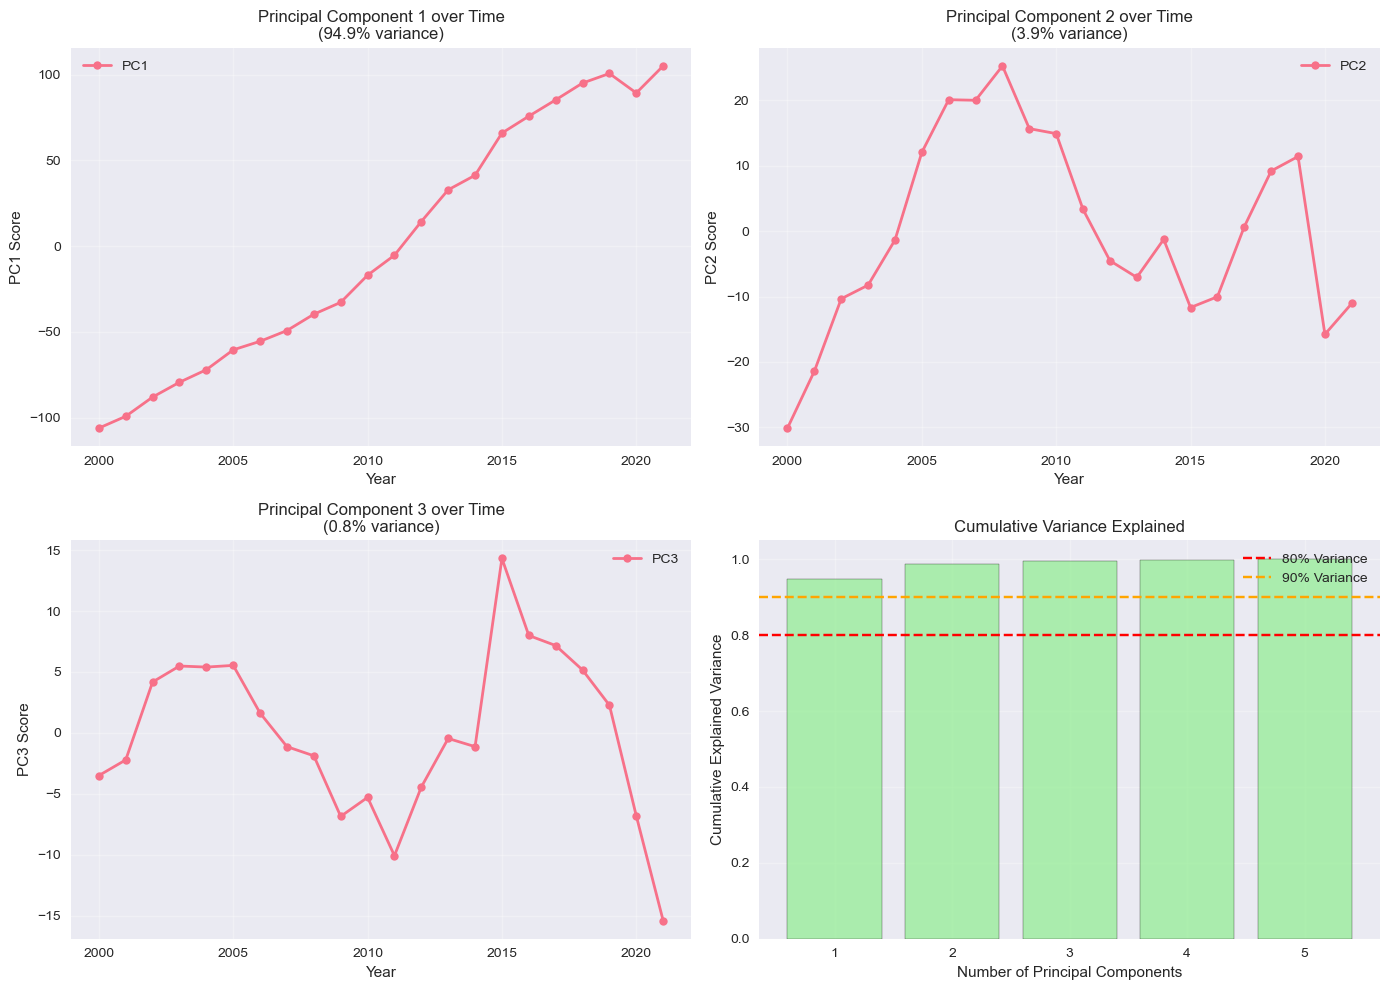


Component Interpretation:

Principal Component 1 (94.9% variance):
  Luas Tanah Pertanian (km persegi): 40.121 (positive contribution)
  KDNK: 33.370 (positive contribution)
  Populasi (Juta): 32.940 (positive contribution)
  Panjang Jalan Raya : 31.815 (positive contribution)
  Jumlah Tenaga Terhasil (quad Btu): 21.629 (positive contribution)

Principal Component 2 (3.9% variance):
  Jumlah Tenaga Terhasil (quad Btu): 11.831 (positive contribution)
  Luas Tanah Pertanian (km persegi): -6.639 (negative contribution)
  Panjang Jalan Raya : -4.302 (negative contribution)
  Populasi (Juta): 3.275 (positive contribution)
  KDNK: 1.183 (positive contribution)

Principal Component 3 (0.8% variance):
  Luas Tanah Pertanian (km persegi): 4.728 (positive contribution)
  Panjang Jalan Raya : -3.203 (negative contribution)
  KDNK: -2.397 (negative contribution)
  Jumlah Tenaga Terhasil (quad Btu): 2.193 (positive contribution)
  Populasi (Juta): -1.678 (negative contribution)

Reconstruction Ana

In [28]:
#AnalisiS Objektif Ketiga
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Read the data
file_path = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\standardized.csv"
df = pd.read_csv(file_path)

# Separate features (excluding 'tahun' and 'Pelepasan Karbon')
X = df.drop(['tahun', 'Pelepasan Karbon (tons)'], axis=1)
years = df['tahun']


print("\nFeatures for PCA:")
print(X.columns.tolist())
print(f"\nFeature means: {X.mean().values}")
print(f"Feature stds: {X.std().values}")

# Since data is already standardized, we can use covariance matrix directly
# Perform PCA with covariance matrix
pca = PCA()
X_pca = pca.fit_transform(X)

# Create results DataFrame
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)
pca_df['tahun'] = years.values

print("\nPCA Results:")
print("="*50)

# Explained variance
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("\nExplained Variance for each component:")
for i, (var, ratio) in enumerate(zip(explained_variance, explained_variance_ratio)):
    print(f"PC{i+1}: Variance = {var:.4f}, Proportion = {ratio:.4f} ({ratio*100:.2f}%)")

print("\nCumulative Explained Variance:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"PC{i+1}: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Scree Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
components = range(1, len(explained_variance_ratio) + 1)
plt.plot(components, explained_variance_ratio, 'bo-', linewidth=2, markersize=8, label='Individual')
plt.plot(components, cumulative_variance, 'ro-', linewidth=2, markersize=8, label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Covariance PCA')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(components, explained_variance_ratio, alpha=0.7, color='skyblue', label='Individual')
plt.plot(components, cumulative_variance, 'ro-', linewidth=2, markersize=8, label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Component')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PCA Loadings (Eigenvectors)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loadings_df = pd.DataFrame(
    loadings,
    columns=pca_columns,
    index=X.columns
)

print("\nPCA Loadings (Eigenvectors scaled by sqrt of eigenvalues):")
print(loadings_df)

# Visualize loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='RdBu_r', center=0, fmt='.3f',
            cbar_kws={'label': 'Loading Value'})
plt.title('PCA Loadings Heatmap\n(Relationship between Original Variables and Principal Components)',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Biplot function
def create_biplot(PC1, PC2, loadings, feature_names, years, scale=1.5):
    plt.figure(figsize=(12, 10))
    
    # Scatter plot of principal components
    scatter = plt.scatter(PC1, PC2, c=years, cmap='viridis', s=100, alpha=0.7, edgecolors='black')
    
    # Add year labels
    for i, year in enumerate(years):
        plt.annotate(year, (PC1[i], PC2[i]), xytext=(5, 5), textcoords='offset points', 
                    fontsize=9, alpha=0.8)
    
    # Plot variable loadings as arrows
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, loadings[i, 0]*scale, loadings[i, 1]*scale, 
                 color='red', alpha=0.7, head_width=0.05, head_length=0.1)
        plt.text(loadings[i, 0]*scale*1.15, loadings[i, 1]*scale*1.15, 
                feature, color='red', ha='center', va='center', fontweight='bold')
    
    plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]*100:.1f}%)')
    plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]*100:.1f}%)')
    plt.title('PCA Biplot (PC1 vs PC2)\nPoints colored by Year', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Add colorbar for years
    cbar = plt.colorbar(scatter)
    cbar.set_label('Year')
    
    # Add circle of contribution
    circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--', alpha=0.5)
    plt.gca().add_artist(circle)
    
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Create biplot for first two components
create_biplot(X_pca[:, 0], X_pca[:, 1], loadings_df.values, X.columns, years)

# Time series of principal components
plt.figure(figsize=(14, 10))

# Plot first few principal components over time
for i in range(min(3, X_pca.shape[1])):
    plt.subplot(2, 2, i+1)
    plt.plot(years, X_pca[:, i], 'o-', linewidth=2, markersize=6, label=f'PC{i+1}')
    plt.xlabel('Year')
    plt.ylabel(f'PC{i+1} Score')
    plt.title(f'Principal Component {i+1} over Time\n({explained_variance_ratio[i]*100:.1f}% variance)')
    plt.grid(True, alpha=0.3)
    plt.legend()

# Plot cumulative variance in last subplot
plt.subplot(2, 2, 4)
plt.bar(range(1, len(cumulative_variance)+1), cumulative_variance, 
        alpha=0.7, color='lightgreen', edgecolor='black')
plt.axhline(y=0.8, color='red', linestyle='--', label='80% Variance')
plt.axhline(y=0.9, color='orange', linestyle='--', label='90% Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Component interpretation
print("\nComponent Interpretation:")
print("="*50)
for i in range(min(3, loadings_df.shape[1])):
    print(f"\nPrincipal Component {i+1} ({explained_variance_ratio[i]*100:.1f}% variance):")
    component_loadings = loadings_df.iloc[:, i]
    # Sort by absolute loading values
    sorted_loadings = component_loadings.abs().sort_values(ascending=False)
    for var in sorted_loadings.index:
        loading = component_loadings[var]
        print(f"  {var}: {loading:.3f} ({'positive' if loading > 0 else 'negative'} contribution)")

# Reconstruction analysis
print("\nReconstruction Analysis:")
print("="*50)
n_components_to_keep = 2  # Number of components to keep for reconstruction
pca_reduced = PCA(n_components=n_components_to_keep)
X_reduced = pca_reduced.fit_transform(X)
X_reconstructed = pca_reduced.inverse_transform(X_reduced)

reconstruction_error = np.mean((X - X_reconstructed) ** 2)
print(f"Using {n_components_to_keep} components, reconstruction MSE: {reconstruction_error:.6f}")
print(f"Variance explained by {n_components_to_keep} components: {cumulative_variance[n_components_to_keep-1]*100:.2f}%")

# Display final PCA scores with years
print("\nFirst 5 rows of PCA scores:")
print(pca_df.head())

# Save PCA results to CSV
pca_results_path = file_path.replace('standardized.csv', 'pca_results.csv')
pca_df.to_csv(pca_results_path, index=False)
print(f"\nPCA results saved to: {pca_results_path}")